# 1. A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

In [2]:
wcd=pd.read_csv("Wholesale+Customers+Data.csv")

In [3]:
wcd.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
wcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
wcd.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [6]:
wcd.describe(include="all")

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [7]:
wcd["Total"]=wcd["Fresh"]+wcd["Milk"]+wcd["Grocery"]+wcd["Frozen"]+wcd["Detergents_Paper"]+wcd["Delicatessen"]
wcd.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [8]:
def addlabels(x,y):
    for i in range (len(x)):
        g=int(y[i])
        plt.text(i,g,g,ha="center",va="bottom")
        plt.xticks(rotation=90)

C:\Users\srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


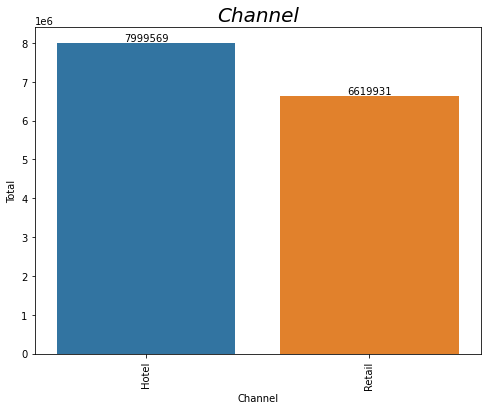

In [9]:
wcd_bar=wcd.groupby("Channel")["Total"].sum().sort_values(ascending=False)
wcd_bar=wcd_bar.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(wcd_bar["Channel"],wcd_bar["Total"])
plt.xlabel("Channel")
plt.ylabel("Total")
plt.title("Channel",fontsize=20,fontweight=0,color="black",loc="center",style="italic")
addlabels(wcd_bar["Channel"],wcd_bar["Total"])

From the above graph, we can conclude that"Hotel" Channel has spent the most and the "Retail" Channel has spent the least. These are based on the total spent value.

We could also see that, from the descriptive table that the "Hotel" variable has the most frequency in the "Channel" column. So this result was expected in some way.

C:\Users\srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


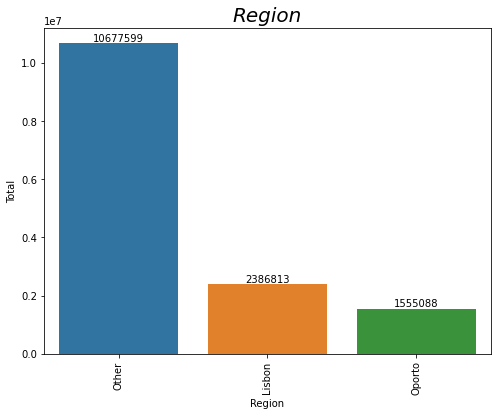

In [10]:
wcd_bar1=wcd.groupby("Region")["Total"].sum().sort_values(ascending=False)
wcd_bar1=wcd_bar1.reset_index()
plt.figure(figsize=(8,6))
sns.barplot(wcd_bar1["Region"],wcd_bar1["Total"])
plt.xlabel("Region")
plt.ylabel("Total")
plt.title("Region",fontsize=20,fontweight=0,color="black",loc="center",style="italic")
addlabels(wcd_bar1["Region"],wcd_bar1["Total"])

From the above graph, we can see that, the maximum spent from the regions was from a collection of regions other than Lisbon and Oporto. This is again based on the total spent value.

 We could also see that, from the descriptive table that the "Other" variable has the most frequency in the "Region" column. So this result was expected in some way.

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [11]:
wcd_channel=wcd.groupby("Channel").sum()
wcd_channel

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Channel,,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,25986,1264414,1521743,2317845,234671,1032270,248988,6619931


<AxesSubplot:xlabel='Channel'>

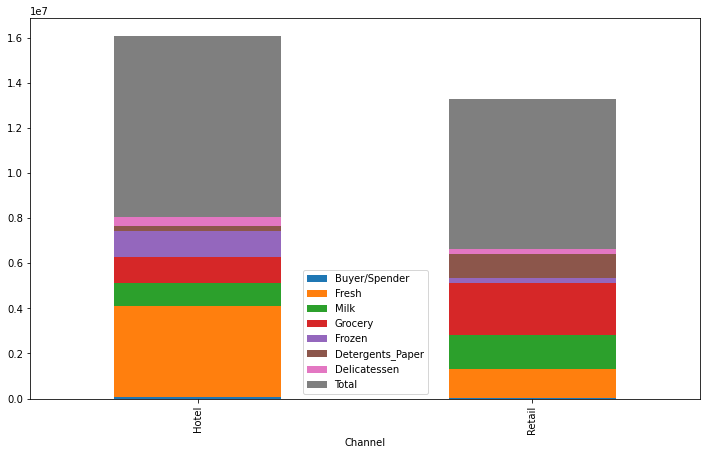

In [12]:
wcd_channel.plot.bar(stacked=True,figsize=(12,7))

<AxesSubplot:xlabel='Channel'>

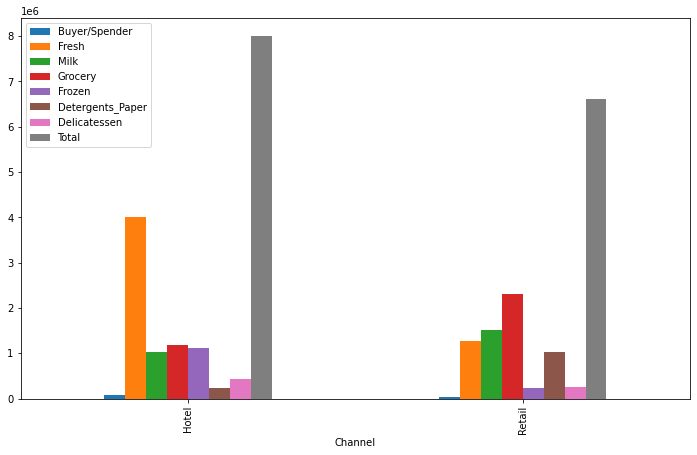

In [13]:
wcd_channel.plot.bar(stacked=False,figsize=(12,7))

The Hotel customers have spent more than the Retail customers.

The hotel customers have spent more on Fresh items, frozen items and delicatessen items when compared to Retail customers, and for the rest of the items, Retail customers have spent more when compared to hotel customers.

The hotel customers have spent most on Fresh items and least on Detergent_paper. The retail customers have spent most on Grocery, and the least on Frozen items.

From this we can conclude that, an average Hotel customer spends more on Fresh items, Frozen items and delicatessen items, when compared to retail customers. But the retail customers spend more on the rest of the items than the hotel customers.

In [14]:
wcd_region=wcd.groupby("Region").sum()
wcd_region

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327,2386813
Oporto,14899,464721,239144,433274,190132,173311,54506,1555088
Other,64026,3960577,1888759,2495251,930492,890410,512110,10677599


<AxesSubplot:xlabel='Region'>

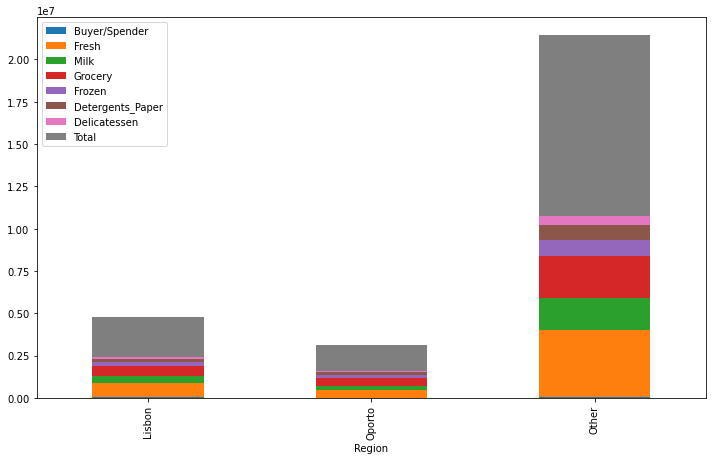

In [15]:
wcd_region.plot.bar(stacked=True,figsize=(12,7))

<AxesSubplot:xlabel='Region'>

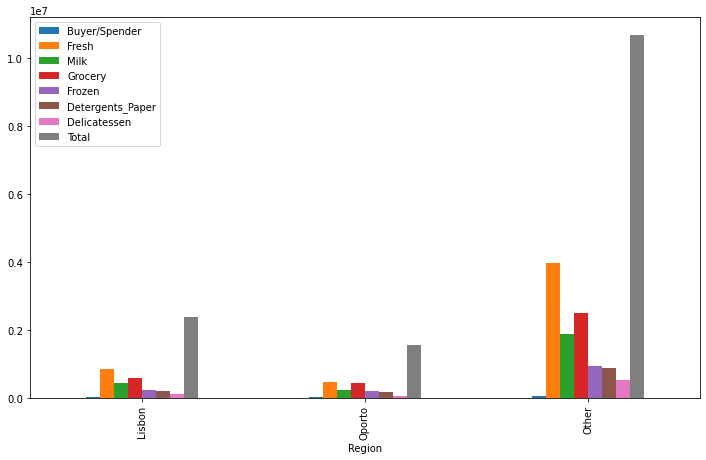

In [16]:
wcd_region.plot.bar(stacked=False,figsize=(12,7))

Based on the regions, the regions other than Lisbon and Oporto have spent more

In all the regions, customers have bought Fresh items more. In Lisbon region the sales of all the items are more than the Oporto region.

In all the regions, the customers have spent most on Fresh items and least on Delicatessen items.

1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [17]:
del wcd["Buyer/Spender"]
del wcd["Total"]

In [18]:
std_dev=round(wcd.std(),2)
std_dev

Fresh               12647.33
Milk                 7380.38
Grocery              9503.16
Frozen               4854.67
Detergents_Paper     4767.85
Delicatessen         2820.11
dtype: float64

From the above series, we can see that the item category which shows the most inconsistet behaviour is the "Fresh" artegory with a standard deviation of 12647.33 and the the category which shows the most consistent behaviour is "Delicatessen" with a standard deviation of 2820.11

I have tried to use the coefficient of Variation to conclude my findings just to be sure about the above claims

In [19]:
Fresh_cv=np.std(wcd["Fresh"])/np.mean(wcd["Fresh"])
Fresh_cv

1.0527196084948245

In [20]:
Milk_cv=np.std(wcd["Milk"])/np.mean(wcd["Milk"])
Milk_cv

1.2718508307424503

In [21]:
Grocery_cv=np.std(wcd["Grocery"])/np.mean(wcd["Grocery"])
Grocery_cv

1.193815447749267

In [22]:
Frozen_cv=np.std(wcd["Frozen"])/np.mean(wcd["Frozen"])
Frozen_cv

1.5785355298607762

In [23]:
Detergents_Paper_cv=np.std(wcd["Detergents_Paper"])/np.mean(wcd["Detergents_Paper"])
Detergents_Paper_cv

1.6527657881041729

In [24]:
Delicatessen_cv=np.std(wcd["Delicatessen"])/np.mean(wcd["Delicatessen"])
Delicatessen_cv

1.8473041039189306

From checking the coeffiecient of Variation, we can see that the "Fresh" category infact has lesser values and is infact the most consistent among the lot much opposite to our claim. Much similarly, the "Delicatessen" category which showed highest consistency based on standard deviation has the highest value of Coefficient of Variation among the lot, thus making it the least consistent

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

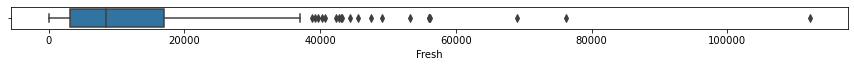

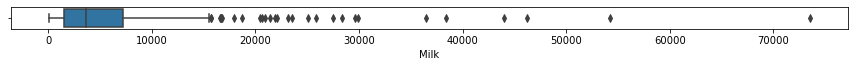

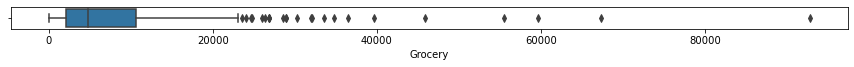

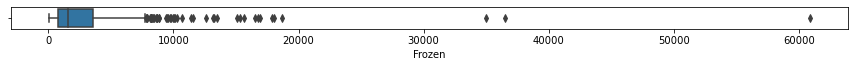

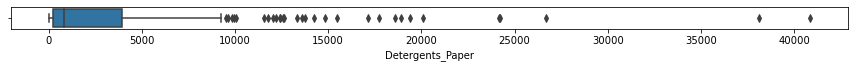

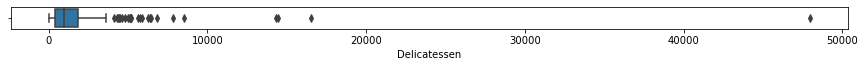

In [25]:
wcd1=wcd.select_dtypes(exclude=["object"])
i=1
for column in wcd1:
    plt.figure(figsize=(15,10))
    plt.subplot(21,1,i)
    sns.boxplot(x=wcd1[column])
    i=i+1

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective 

Based on the descriptive analysis and dispersive tendencies that was calculated, my recommendation for the business would be,

1.	33% of customers are from Retail, and they contribute to 45% of the total amount spent by the customers. The business has to connect with more Retail owners, and convince them to shop with them.

2.	The most amount is being spent on Fresh Items, Grocery Items and then Milk Items. So instead of buying all the six items, the business has to stock more on the aforementioned items.

3.	The Delicatessen and the Frozen Items are bought for comparatively lesser values. So these are the items that are sold lesser. So the business needs to buy these items on a relatively lesser quantities.

# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [26]:
survey=pd.read_csv("Survey-1.csv")

In [27]:
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [28]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [29]:
survey.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [30]:
survey.describe(include="all")

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

In [31]:
Gen_Maj=pd.crosstab(survey["Gender"],survey["Major"])
Gen_Maj

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


<AxesSubplot:xlabel='Gender'>

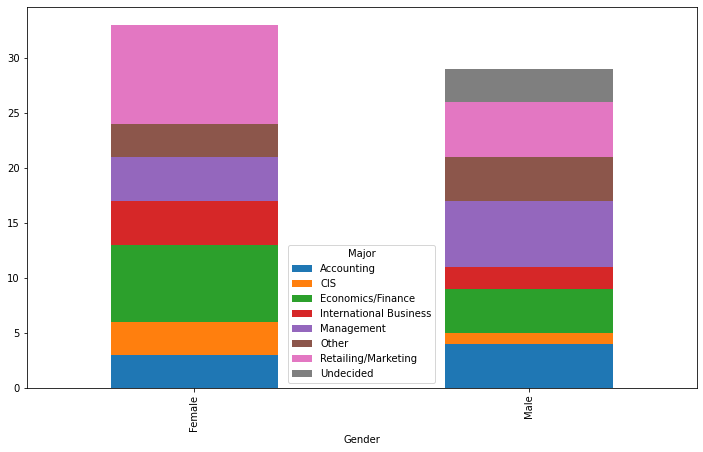

In [32]:
Gen_Maj.plot.bar(stacked=True,figsize=(12,7))

2.1.2. Gender and Grad Intention

In [33]:
Gen_Grad_Int=pd.crosstab(survey["Gender"],survey["Grad Intention"])
Gen_Grad_Int

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


<AxesSubplot:xlabel='Gender'>

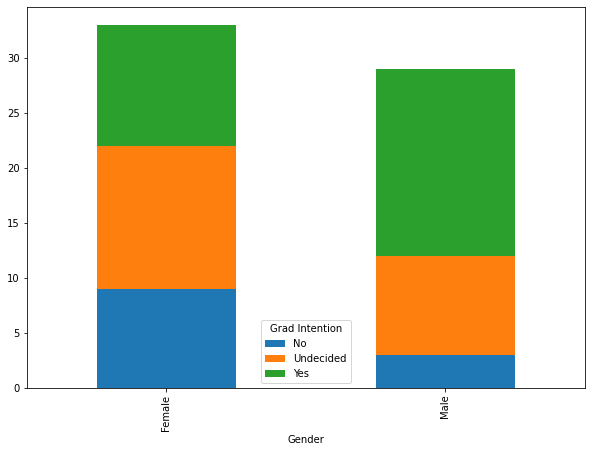

In [34]:
Gen_Grad_Int.plot.bar(stacked=True,figsize=(10,7))

2.1.3. Gender and Employment

In [35]:
Gen_Emp=pd.crosstab(survey["Gender"],survey["Employment"])
Gen_Emp

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


<AxesSubplot:xlabel='Gender'>

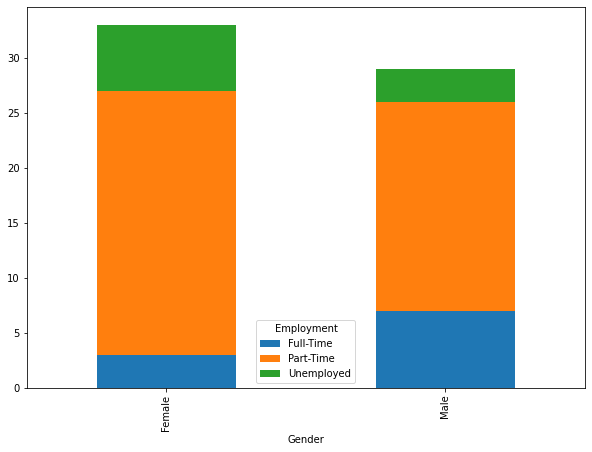

In [36]:
Gen_Emp.plot.bar(stacked=True,figsize=(10,7))

2.1.4. Gender and Computer

In [37]:
Gen_Comp=pd.crosstab(survey["Gender"],survey["Computer"])
Gen_Comp

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


<AxesSubplot:xlabel='Gender'>

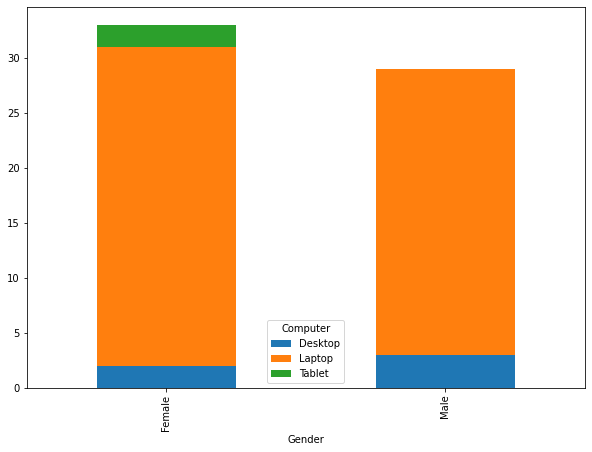

In [38]:
Gen_Comp.plot.bar(stacked=True,figsize=(10,7))

2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question: 

2.2.1. What is the probability that a randomly selected CMSU student will be male? 

In [39]:
Total_Students_Table=survey["Gender"].value_counts()
Total_Students_Table

Female    33
Male      29
Name: Gender, dtype: int64

In [40]:
Total_Students=Total_Students_Table.sum()
Total_Students

62

In [41]:
No_of_males=Total_Students_Table["Male"]
No_of_males

29

In [42]:
Prob_Male=round(No_of_males/Total_Students,2)
print("The probability that a randomly selected CSMU student being a Male is",Prob_Male)

The probability that a randomly selected CSMU student being a Male is 0.47


2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [43]:
No_of_females=Total_Students_Table["Female"]
No_of_females

33

In [44]:
Prob_Female=round(No_of_females/Total_Students,2)
print("The probability that a randomly selected CSMU student being a Female is",Prob_Female)

The probability that a randomly selected CSMU student being a Female is 0.53


2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [45]:
print("The probability of a male student being of Accounting major is ",round(Gen_Maj["Accounting"]["Male"]/No_of_males,2))

The probability of a male student being of Accounting major is  0.14


In [46]:
print("The probability of a male student being of CIS major is ",round(Gen_Maj["CIS"]["Male"]/No_of_males,2))

The probability of a male student being of CIS major is  0.03


In [47]:
print("The probability of a male student being of Economics/Finance major is ",round(Gen_Maj["Economics/Finance"]["Male"]/No_of_males,2))

The probability of a male student being of Economics/Finance major is  0.14


In [48]:
print("The probability of a male student being of International Business major is ",round(Gen_Maj["International Business"]["Male"]/No_of_males,2))

The probability of a male student being of International Business major is  0.07


In [49]:
print("The probability of a male student being of Management major is ",round(Gen_Maj["Management"]["Male"]/No_of_males,2))

The probability of a male student being of Management major is  0.21


In [50]:
print("The probability of a male student being of Retailing/Marketing major is ",round(Gen_Maj["Retailing/Marketing"]["Male"]/No_of_males,2))

The probability of a male student being of Retailing/Marketing major is  0.17


In [51]:
print("The probability of a male student being of Other major is ",round(Gen_Maj["Other"]["Male"]/No_of_males,2))

The probability of a male student being of Other major is  0.14


In [52]:
print("The probability of a male student being of being undecided on major is ",round(Gen_Maj["Undecided"]["Male"]/No_of_males,2))

The probability of a male student being of being undecided on major is  0.1


2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [53]:
print("The probability of a female student being of Accounting major is ",round(Gen_Maj["Accounting"]["Female"]/No_of_females,2))

The probability of a female student being of Accounting major is  0.09


In [54]:
print("The probability of a female student being of CIS major is ",round(Gen_Maj["CIS"]["Female"]/No_of_females,2))

The probability of a female student being of CIS major is  0.09


In [55]:
print("The probability of a female student being of Economics/Finance major is ",round(Gen_Maj["Economics/Finance"]["Female"]/No_of_females,2))

The probability of a female student being of Economics/Finance major is  0.21


In [56]:
print("The probability of a female student being of International Business major is ",round(Gen_Maj["International Business"]["Female"]/No_of_females,2))

The probability of a female student being of International Business major is  0.12


In [57]:
print("The probability of a female student being of Management major is ",round(Gen_Maj["Management"]["Female"]/No_of_females,2))

The probability of a female student being of Management major is  0.12


In [58]:
print("The probability of a female student being of Retailing/Marketing major is ",round(Gen_Maj["Retailing/Marketing"]["Female"]/No_of_females,2))

The probability of a female student being of Retailing/Marketing major is  0.27


In [59]:
print("The probability of a female student being of Other major is ",round(Gen_Maj["Other"]["Female"]/No_of_females,2))

The probability of a female student being of Other major is  0.09


In [60]:
print("The probability of a female student being of being undecided on major is ",round(Gen_Maj["Undecided"]["Female"]/No_of_females,2))

The probability of a female student being of being undecided on major is  0.0


2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [61]:
Prob_Intends_Grad_Male=round(Gen_Grad_Int["Yes"]["Male"]/No_of_males,2)

In [62]:
print("The probability that a random chosen student is male and intends to graduate is",Prob_Intends_Grad_Male)

The probability that a random chosen student is male and intends to graduate is 0.59


2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [63]:
Prob_No_Lap_Female=round((Gen_Comp["Desktop"]["Female"]+Gen_Comp["Tablet"]["Female"])/No_of_females,2)

In [64]:
print("The probability that a random chosen student is female and does not have a laptop is",Prob_No_Lap_Female)

The probability that a random chosen student is female and does not have a laptop is 0.12


2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment

In [65]:
Prob_Male

0.47

In [66]:
Prob_Full_Time_Employed=round((Gen_Emp["Full-Time"]["Female"]+Gen_Emp["Full-Time"]["Male"])/Total_Students,2)

In [67]:
Prob_Full_Time_Male=round((Gen_Emp["Full-Time"]["Male"])/Total_Students,2)

In [68]:
Prob_Male_Or_Full_Time_Employed=round(Prob_Male+Prob_Full_Time_Employed-Prob_Full_Time_Male,2)
print("The probability that a randomly chosen student is either male or has full time employment is",Prob_Male_Or_Full_Time_Employed)

The probability that a randomly chosen student is either male or has full time employment is 0.52


2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [69]:
Prob_Female_Major_Int_Bus=Gen_Maj["International Business"]["Female"]/No_of_females
Prob_Female_Major_Int_Bus

0.12121212121212122

In [70]:
Prob_Female_Major_Man=Gen_Maj["Management"]["Female"]/No_of_females
Prob_Female_Major_Man

0.12121212121212122

In [71]:
Prob_Female_Maj_Int_Bus_Man=round(Prob_Female_Major_Int_Bus+Prob_Female_Major_Man,2)
print("The conditional probability that if a female student is chosen the probability that she would major in International business or in management is",Prob_Female_Maj_Int_Bus_Man)

The conditional probability that if a female student is chosen the probability that she would major in International business or in management is 0.24


2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [72]:
Gen_Grad_Int

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [73]:
Gen_Grad_Int1=Gen_Grad_Int.drop("Undecided",axis=1)
Gen_Grad_Int1

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [74]:
Prob_Female_New=(Gen_Grad_Int1["No"]["Female"]+Gen_Grad_Int1["Yes"]["Female"])/Gen_Grad_Int1.sum().sum()
Prob_Female_New

0.5

In [75]:
Prob_Grad_Int_New=(Gen_Grad_Int1["Yes"]["Female"]+Gen_Grad_Int1["Yes"]["Male"])/Gen_Grad_Int1.sum().sum()
Prob_Grad_Int_New

0.7

P(Female) * P(Graduation Intention)

In [76]:
Multiplied_Prob=Prob_Female_New*Prob_Grad_Int_New
Multiplied_Prob

0.35

P(Female and Graduate Intention)

In [77]:
Prob_Female_Grad_Int=(Gen_Grad_Int1["Yes"]["Female"])/Gen_Grad_Int1.sum().sum()
Prob_Female_Grad_Int

0.275

Here we can see that the probability P(Female) * P(Graduation Intention) and P(Female and Graduate Intention) are not equal. So they are not independent events

2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [78]:
GPA_Less_3=survey[survey["GPA"]<3]

In [79]:
Total_GPA_Less_3=GPA_Less_3["GPA"].value_counts().sum()

In [80]:
Prob_GPA_Less_3=round(Total_GPA_Less_3/Total_Students,2)
Prob_GPA_Less_3

0.27

In [81]:
print("The probability that a student chosen randomly has a GPA less than 3 is",Prob_GPA_Less_3)

The probability that a student chosen randomly has a GPA less than 3 is 0.27


2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [82]:
survey[survey["Salary"]>=50].value_counts().sum()

32

In [83]:
Gen_Sal=pd.crosstab(survey["Gender"],survey["Salary"]>=50)

In [84]:
Gen_Sal

Salary,False,True
Gender,,
Female,15,18
Male,15,14


In [85]:
print("The conditional probability that given a male student, he will earn 50 or more is",round(14/(15+14),2))

The conditional probability that given a male student, he will earn 50 or more is 0.48


In [86]:
print("The conditional probability that given a female student, she will earn 50 or more is",round(18/(15+18),2))

The conditional probability that given a female student, she will earn 50 or more is 0.55


2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

C:\Users\srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GPA', ylabel='count'>

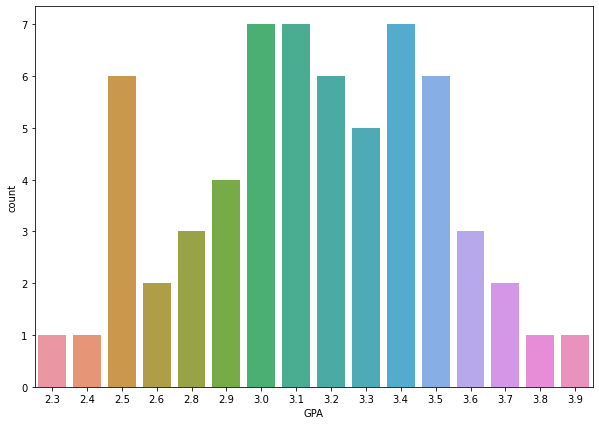

In [87]:
plt.figure(figsize=(10,7))
sns.countplot(survey["GPA"])

In [88]:
stats.shapiro(survey["GPA"])

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

The p value (0.112) is greater than 0.05 (confidence level). Hence the distribution is normal.

C:\Users\srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

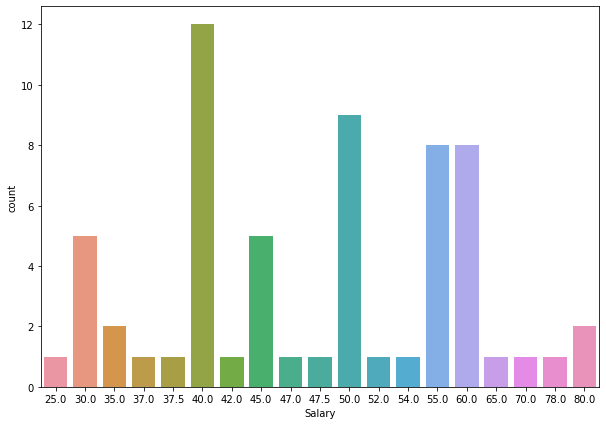

In [89]:
plt.figure(figsize=(10,7))
sns.countplot(survey["Salary"])

In [90]:
stats.shapiro(survey["Salary"])

ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)

The p value (0.02) is lesser than 0.05 (confidence level). Hence the distribution is not normal.

C:\Users\srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending', ylabel='count'>

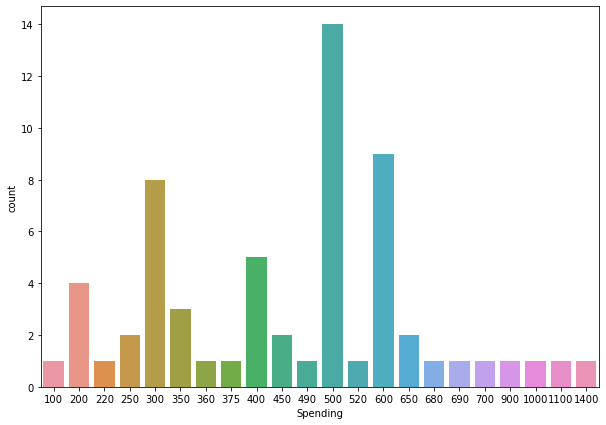

In [91]:
plt.figure(figsize=(10,7))
sns.countplot(survey["Spending"])

In [92]:
stats.shapiro(survey["Spending"])

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

The p value (1.68e-05) is lesser than 0.05 (confidence level). Hence the distribution is not normal.

C:\Users\srikanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Text Messages', ylabel='count'>

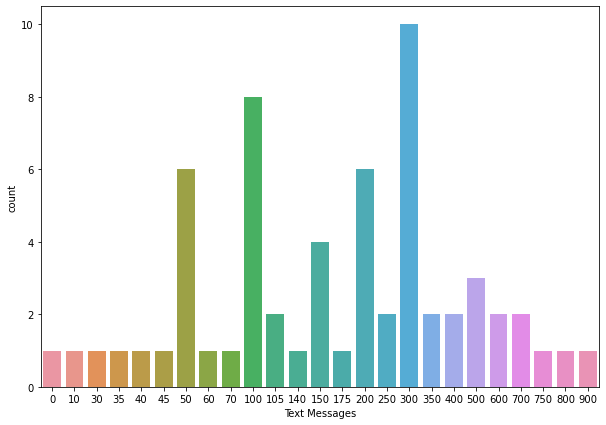

In [93]:
plt.figure(figsize=(10,7))
sns.countplot(survey["Text Messages"])

In [94]:
stats.shapiro(survey["Text Messages"])

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

The p value (4.32e-06) is lesser than 0.05 (confidence level). Hence the distribution is not normal.

2.8.2 Write a note summarizing your conclusions

From this analysis, we can conclude that there are many factors affecting the graduation of the students. The survey has the data about the major which the students are taking up, the GPA, the type of employment, intention to graduate, salary, social networking, spending, satisfaction, computer and text messages. We have used probability to analyse the data. With this probability we can genaralize for all the Under Garaduate students of the CMSU, so that we can find out how many students will intend to graduate, and also look into how much the university has to help to the students to improve their graduating intention.

# An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

In [95]:
shingles=pd.read_csv("A+&+B+shingles.csv")

In [96]:
shingles.head(5)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [97]:
shingles.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [98]:
from scipy.stats import ttest_ind
import statsmodels.stats.api as sm
from scipy.stats import ttest_1samp

For A Column

Ho - Null Hypothesis - Mean moisture content is less than or equal to 0.35

Ha - Alternate Hypothesis - Mean moisture content is greater than 0.35

alpha = 0.05

In [99]:
ta,pa=ttest_1samp(shingles.A,0.35)

In [100]:
ta

-1.4735046253382782

In [101]:
pa

0.14955266289815025

Since the test is one tailed, and python gives the probability value of two tail, we need to divide the arrived p value by 2 to get the probability value for the one tail test

In [102]:
Probability_A=pa/2
Probability_A

0.07477633144907513

Here as the p value is greater than alpha, ( p(0.07)>alpha(0.05)), we fail to reject the null hypothesis. Hence the null hypothesis that mean moisture content is lesser than or equal to 0.35 is the correct hypothesis

For B Column

Ho - Null Hypothesis - Mean moisture content is less than or equal to 0.35

Ha - Alternate Hypothesis - Mean moisture content is greater than 0.35

alpha = 0.05

In [103]:
tb,pb=ttest_1samp(shingles.B,0.35,nan_policy="omit")

In [104]:
tb

-3.1003313069986995

In [105]:
pb

0.004180954800638365

Since the test is one tailed, and python gives the probability value of two tail, we need to divide the arrived p value by 2 to get the probability value for the one tail test

In [106]:
Probability_B=pb/2
Probability_B

0.0020904774003191826

Here as the p value is lesser than alpha, ( p(0.002)<alpha(0.05)), we reject the null hypothesis. Hence the alternate hypothesis that mean moisture content is greater than 0.35 is the correct hypothesis

3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Ho - Null Hyouthesis - Mean of A = Mean of B

Ha - Alternative Hypothesis - Mean of A is not equal to Mean of B

Assumptions

1. alpha = 0.05

2. The distributions of the two populations are normal

3. The variances of the population are same

In [107]:
t1,p1=ttest_ind(shingles.A,shingles.B,equal_var=True,nan_policy="omit")

In [108]:
p1

0.2017496571835306

In [109]:
t1

1.2896282719661123

Here the p value is greater than alpha value(confidence level). 0.2017>0.05.
Hence we fail to reject the null hypothesis.

Hence we can say that the the population mean for both the samples A and B are equal.